# **Importação das bibliotecas**





In [ ]:
import pandas as pd  # Importa a biblioteca pandas, usada para manipulação de dados
import numpy as np  # Importa a biblioteca numpy, usada para operações numéricas
import matplotlib.pyplot as plt  # Importa a biblioteca matplotlib, usada para criar gráficos
import sympy as sp  # Importa a biblioteca sympy, usada para cálculos simbólicos

# **Carga dos dados**


In [ ]:
# Carregando os dados de temperatura da estação de Recife
url = "/content/station_recife.csv"  # Define o caminho do arquivo CSV com os dados
dados = pd.read_csv(url)  # Lê o arquivo CSV e armazena os dados em um DataFrame do pandas

# **Seleção dos dados**

In [ ]:
# Selecionando os dados para os anos de 2012 a 2018, excluindo 2015
dados_selecionados = dados[(dados['YEAR'] >= 2012) & (dados['YEAR'] <= 2018) & (dados['YEAR'] != 2015) & (dados['YEAR'] != 2013) & (dados['YEAR'] != 2016)]
# Filtra os dados para incluir apenas os anos de 2012 a 2018, excluindo 2015, 2013 e 2016

# Selecionando as temperaturas de agosto
temperaturas_dezembro = dados_selecionados['DEC'].values  # Seleciona as temperaturas de dezembro e as armazena em um array
anos_reais = dados_selecionados['YEAR'].values  # Seleciona os anos correspondentes e os armazena em um array

# Criando uma nova lista de anos que começa em 1
anos = [1, 3, 6, 7]  # Cria um array de anos começando em 1 até o número de anos reais

# **Verificação dos dados**

In [ ]:
# Verificando os dados
print(f"Anos selecionados (reais): {anos_reais}")  # Imprime os anos reais selecionados
print(f"Anos selecionados (ajustados): {anos}")  # Imprime os anos ajustados
print(f"Temperaturas de dezembro: {temperaturas_dezembro}")  # Imprime as temperaturas de dezembro


Anos selecionados (reais): [2012 2014 2017 2018]
Anos selecionados (ajustados): [1, 3, 6, 7]
Temperaturas de dezembro: [27.4 26.8 27.6 27.2]


# **Função da interpolação polinomial de Lagrange**

In [ ]:
# Função para realizar a interpolação polinomial de Lagrange
def interpolacao_lagrange(x, y):
    n = len(x)  # Obtém o número de pontos
    simbolo_x = sp.symbols('x')  # Define o símbolo x para cálculos simbólicos
    polinomio = 0  # Inicializa o polinômio

    for i in range(n):  # Itera sobre cada ponto
        termo = y[i]  # Inicializa o termo com o valor y correspondente
        for j in range(n):  # Itera sobre cada ponto novamente
            if i != j:  # Se não for o mesmo ponto
                termo *= (simbolo_x - x[j]) / (x[i] - x[j])  # Calcula o termo de Lagrange
        polinomio += termo  # Adiciona o termo ao polinômio

    return sp.simplify(polinomio)  # Simplifica e retorna o polinômio

# **Função da interpolação polinomial de Newton (diferenças dividadas)**

In [ ]:
# Função para realizar a interpolação polinomial de Newton
def interpolacao_newton(x, y):
    n = len(x)  # Obtém o número de pontos
    coeficientes = np.zeros([n, n])  # Cria uma matriz de zeros para os coeficientes
    coeficientes[:, 0] = y  # Define a primeira coluna com os valores y

    for j in range(1, n):  # Itera sobre cada coluna
        for i in range(n - j):  # Itera sobre cada linha
            coeficientes[i][j] = (coeficientes[i + 1][j - 1] - coeficientes[i][j - 1]) / (x[i + j] - x[i])
            # Calcula os coeficientes de Newton

    simbolo_x = sp.symbols('x')  # Define o símbolo x para cálculos simbólicos
    polinomio = coeficientes[0, 0]  # Inicializa o polinômio com o primeiro coeficiente
    produto = 1  # Inicializa o produto

    for i in range(1, n):  # Itera sobre cada ponto
        produto *= (simbolo_x - x[i - 1])  # Atualiza o produto
        polinomio += coeficientes[0, i] * produto  # Adiciona o termo ao polinômio

    return sp.simplify(polinomio)  # Simplifica e retorna o polinômio

# **Realizando a interpolação polinomial e exibindo os polinômios encontrados**

In [ ]:
# Realizando a interpolação com ambos os métodos
polinomio_lagrange = interpolacao_lagrange(anos, temperaturas_dezembro)  # Calcula o polinômio de Lagrange
polinomio_newton = interpolacao_newton(anos, temperaturas_dezembro)  # Calcula o polinômio de Newton

# Exibindo os polinômios encontrados
print(f"Polinômio de Lagrange: {polinomio_lagrange}")  # Imprime o polinômio de Lagrange
print(f"Polinômio de Newton: {polinomio_newton}")  # Imprime o polinômio de Newton

Polinômio de Lagrange: -0.0466666666666669*x**3 + 0.580000000000003*x**2 - 2.01333333333333*x + 28.88
Polinômio de Newton: -0.0466666666666667*x**3 + 0.58*x**2 - 2.01333333333333*x + 28.88


# **Calculando temperatura do ano de 2015**


In [ ]:
# Simulando a temperatura de agosto para o ano de 2015 (Ano 4)
ano_faltante = 4  # Define o ano faltante como 4
temp_lagrange = polinomio_lagrange.evalf(subs={sp.symbols('x'): ano_faltante})  # Calcula a temperatura usando Lagrange
temp_newton = polinomio_newton.evalf(subs={sp.symbols('x'): ano_faltante})  # Calcula a temperatura usando Newton

print(f"Previsão de temperatura em dezembro de 2015 pelo polinômio de Lagrange: {temp_lagrange}")  # Imprime a previsão de Lagrange
print(f"Previsão de temperatura em dezembro de 2015 pelo polinômio de Newton: {temp_newton}")  # Imprime a previsão de Newton

Previsão de temperatura em dezembro de 2015 pelo polinômio de Lagrange: 27.1200000000001
Previsão de temperatura em dezembro de 2015 pelo polinômio de Newton: 27.1200000000000


# **Plotar gráfico**

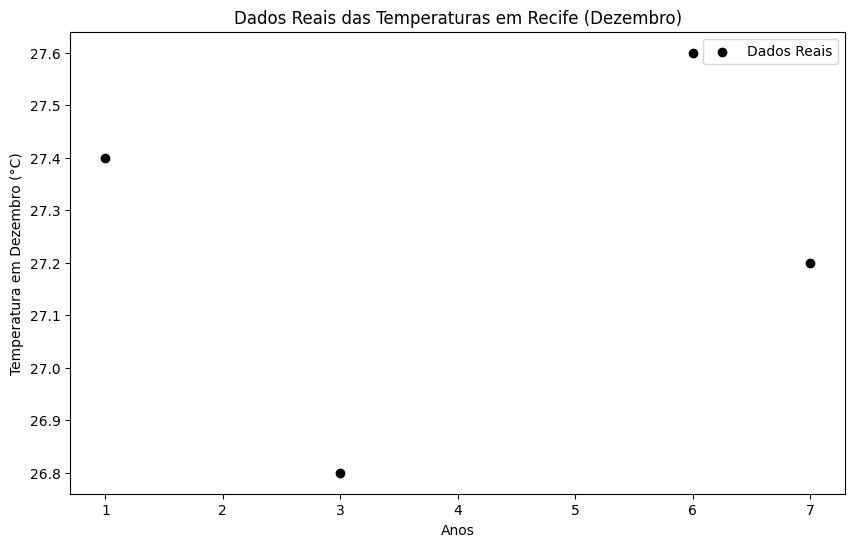

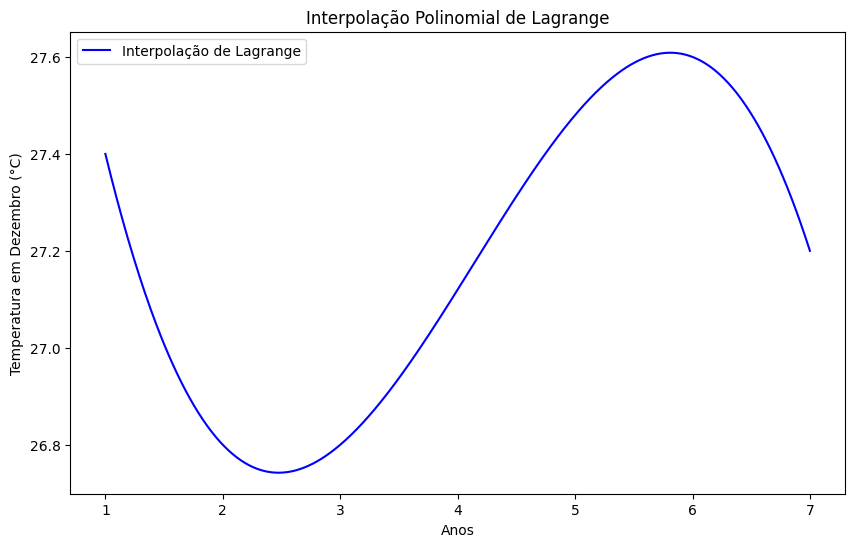

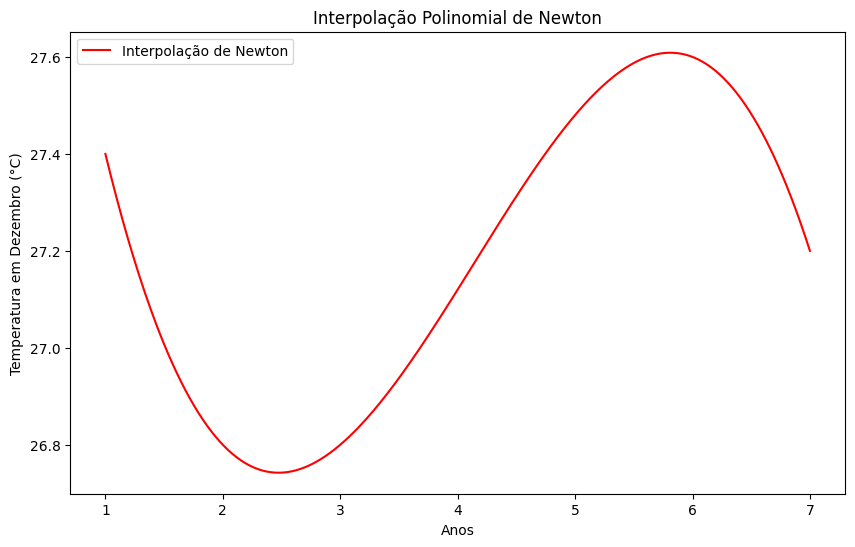

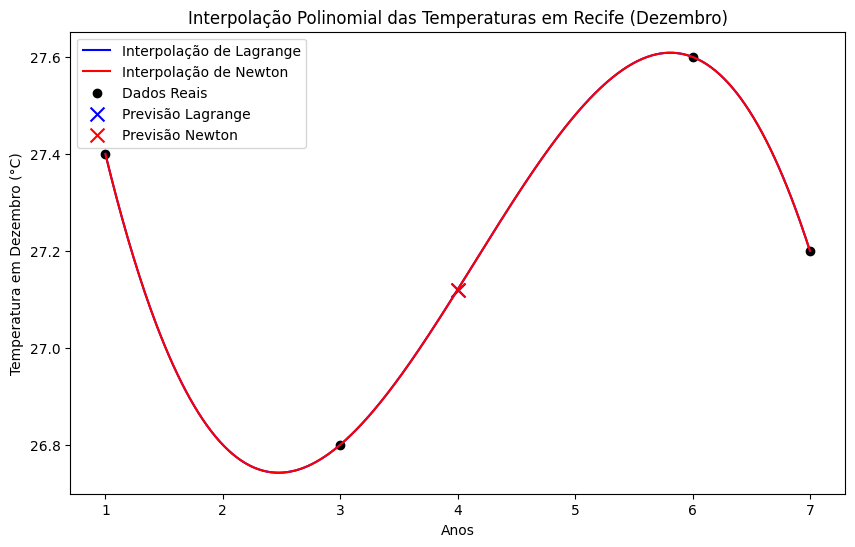

In [ ]:
# Gráfico 1: Pontos escolhidos
plt.figure(figsize=(10, 6))
plt.scatter(anos, temperaturas_dezembro, color='black', label='Dados Reais')
plt.xlabel('Anos')
plt.ylabel('Temperatura em Dezembro (°C)')
plt.title('Dados Reais das Temperaturas em Recife (Dezembro)')
plt.legend()
plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
plt.show()

# Gráfico 2: Polinômio de Lagrange
x_plot = np.linspace(min(anos), max(anos), 500)
y_lagrange = [polinomio_lagrange.evalf(subs={sp.symbols('x'): xi}) for xi in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_lagrange, label='Interpolação de Lagrange', color='blue')
plt.xlabel('Anos')
plt.ylabel('Temperatura em Dezembro (°C)')
plt.title('Interpolação Polinomial de Lagrange')
plt.legend()
plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
plt.show()

# Gráfico 3: Polinômio de Newton
y_newton = [polinomio_newton.evalf(subs={sp.symbols('x'): xi}) for xi in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_newton, label='Interpolação de Newton', color='red')
plt.xlabel('Anos')
plt.ylabel('Temperatura em Dezembro (°C)')
plt.title('Interpolação Polinomial de Newton')
plt.legend()
plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
plt.show()

# Gráfico 4: Combinação de tudo
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_lagrange, label='Interpolação de Lagrange', color='blue')
plt.plot(x_plot, y_newton, label='Interpolação de Newton', color='red')
plt.scatter(anos, temperaturas_dezembro, color='black', label='Dados Reais')
plt.scatter(ano_faltante, temp_lagrange, color='blue', marker='x', s=100, label='Previsão Lagrange')
plt.scatter(ano_faltante, temp_newton, color='red', marker='x', s=100, label='Previsão Newton')
plt.legend()
plt.xlabel('Anos')
plt.ylabel('Temperatura em Dezembro (°C)')
plt.title('Interpolação Polinomial das Temperaturas em Recife (Dezembro)')
plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
plt.show()

In [ ]:
dados.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'D-J-F', 'M-A-M', 'J-J-A', 'S-O-N', 'metANN'],
      dtype='object')

In [ ]:
escolhidos = dados[(dados['YEAR'] >= 2012) & (dados['YEAR'] <= 2018) & (dados['YEAR'] != 2015) & (dados['YEAR'] != 2013) & (dados['YEAR'] != 2016)]
print(escolhidos.groupby(['YEAR','DEC']))

In [ ]:
escolhidos

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
70,2012,26.25,26.26,26.54,26.10,25.50,24.85,24.45,24.00,24.90,25.65,26.85,27.4,26.45,26.05,24.43,25.80,25.68
72,2014,26.50,26.55,27.10,27.25,25.95,25.15,24.60,24.35,25.05,25.85,26.50,26.8,26.65,26.77,24.70,25.80,25.98
75,2017,27.60,28.05,27.50,26.80,26.20,25.35,24.30,24.30,25.00,25.95,26.95,27.6,27.67,26.83,24.65,25.97,26.28
76,2018,27.10,27.15,27.15,26.15,25.85,24.75,24.10,24.40,25.00,26.50,27.25,27.2,27.28,26.38,24.42,26.25,26.08


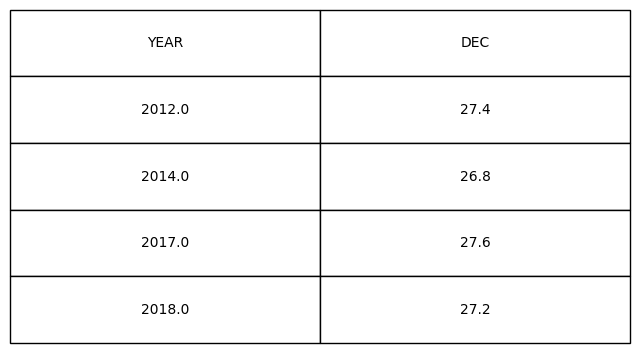

In [ ]:
# Seu DataFrame 'mostre'
mostre = escolhidos.loc[:, ['YEAR', 'DEC']]

# Configurações de plotagem
fig, ax = plt.subplots(figsize=(8, 4))  # Ajuste o tamanho da figura conforme necessário
ax.axis('tight')
ax.axis('off')

# Criando a tabela a partir do DataFrame
tabela = ax.table(cellText=mostre.values, colLabels=mostre.columns, cellLoc='center', loc='center')

tabela.scale(1, 4) # Aumenta a altura das células

# Salvando como imagem
plt.savefig('escolhidos.png', bbox_inches='tight', dpi=300)

# Exibindo a imagem
plt.show()